# Exploratory Data Analysis (EDA) – Gradient Boosting Classifier Model

## Dataset

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
%matplotlib inline


In [16]:
# Load the dataset
df = pd.read_csv("/workspaces/CS_Group07_StudentDepressionDetection/Data/Student Depression Dataset.csv")  # adjust path if needed
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Check shape, info, nulls

In [18]:
print("Shape (Rows, columns):", df.shape)
print("\nInfo (Column type & non-null values):")
print(df.info())
print("\nMissing Values per column:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Shape (Rows, columns): (27901, 18)

Info (Column type & non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 

### Drop nulls

In [21]:
df = df.dropna() #Remove rows with missing values
print("\nShape after removing missing values:", df.shape)


Shape after removing missing values: (27898, 18)


### Clean column names

Removes spaces and question marks in column names

In [20]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("?", "")
df.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_,Work/Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Analysis

### Statistical summary 

In [22]:
print(df.describe(include='all'))

                   id Gender           Age    City Profession  \
count    27898.000000  27898  27898.000000   27898      27898   
unique            NaN      2           NaN      52         14   
top               NaN   Male           NaN  Kalyan    Student   
freq              NaN  15546           NaN    1570      27867   
mean     70442.953402    NaN     25.822174     NaN        NaN   
std      40642.015063    NaN      4.905651     NaN        NaN   
min          2.000000    NaN     18.000000     NaN        NaN   
25%      35040.750000    NaN     21.000000     NaN        NaN   
50%      70689.000000    NaN     25.000000     NaN        NaN   
75%     105824.750000    NaN     30.000000     NaN        NaN   
max     140699.000000    NaN     59.000000     NaN        NaN   

        Academic_Pressure  Work_Pressure          CGPA  Study_Satisfaction  \
count        27898.000000   27898.000000  27898.000000        27898.000000   
unique                NaN            NaN           NaN         

### Target column distribution (Depressed vs Not Depressed)

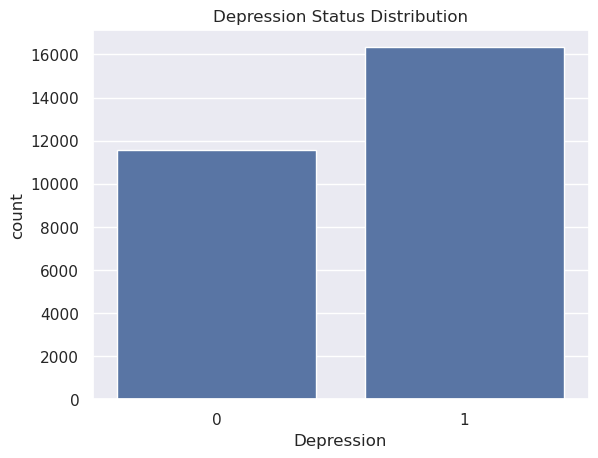

In [23]:
sns.countplot(data=df, x='Depression')
plt.title('Depression Status Distribution')
plt.show()


### Separate categorical and numerical

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


### Distribution plots for numerical columns

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


### Count plots for categorical columns

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Category Distribution: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Boxplots for numerical columns vs target

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Depression', y=col, palette='coolwarm')
    plt.title(f'{col} vs Depression')
    plt.show()


### Count plots of categorical vs target

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Depression', order=df[col].value_counts().index, palette='muted')
    plt.title(f'{col} vs Depression')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Correlation heatmap

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
